# To create a Simple Linear Regression Model

Task - To predict the score if the student studies 9.25 hrs

In [32]:
#Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

In [2]:
#Importing the dataset
data = pd.read_csv("C:/Users/Pavilion/Downloads/student_scores - student_scores.csv")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#To display the first 10 rows of the dataset.
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#To check if the dataset has any missing values.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#To display the columns
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
#To check the number of rows and number of columns in the dataset.
data.shape

(25, 2)

In [8]:
#To check the type of columns, number of entries.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#To display few statistical parameters of the dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#To check the correleration coefficient 
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# Bivariate Analysis of Scores and Hours

<AxesSubplot:>

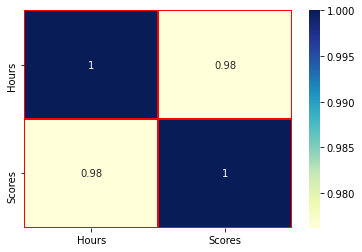

In [11]:
sns.heatmap(data.corr(), linecolor ='red',annot = True, 
            linewidth = 0.8,cmap = 'YlGnBu',cbar = True)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

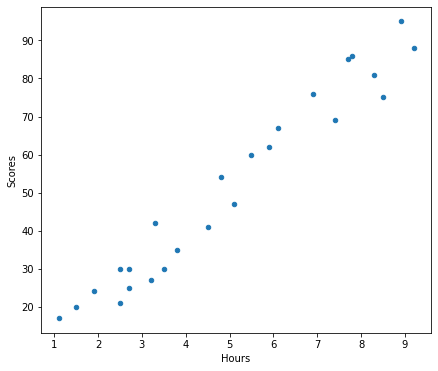

In [12]:
#To check how the two variables are co releated.
data.plot(kind = "scatter", x = 'Hours', y = 'Scores', figsize = (7,6))

# Splitting the dataset in the ratio of 7:3 for making predictions

In [48]:
#Segragating the datset into dependent and independent features.
X = data[['Hours']]
Y = data[['Scores']]

#Unpacking the dataset into training and test dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 200)

In [49]:
#Printing the size of 'Scores' (Indpendent feature)
print("The size of training data having independent feature is :- {0}".format(X_train.shape))

The size of training data having independent feature is :- (15, 1)


In [50]:
print("The size of training data having dependant feature is :- {0}".format(Y_train.shape))
Y_train.shape

The size of training data having dependant feature is :- (15, 1)


(15, 1)

In [51]:
X_test.shape

(10, 1)

In [52]:
Y_test.shape

(10, 1)

# Training the model using Training Data.

In [53]:
#Creating an instance of LinearRegression package
lr = LinearRegression()

In [54]:
#Training the model
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
#Printing the value of intercept of the linear regression equation
lr.intercept_

array([2.35147017])

In [56]:
#Printing the value of slope of the Linear Regression equation
lr.coef_

array([[9.77590637]])

# Predicting the Scores (Target) corresponding to Hours using test data

In [57]:
#Making predictions for scores using test data
predictions = lr.predict(X_test)

In [58]:
predictions

array([[74.69317728],
       [39.49991436],
       [33.63437054],
       [20.92569226],
       [69.80522409],
       [61.984499  ],
       [26.79123608],
       [17.01532972],
       [28.74641736],
       [34.61196118]])

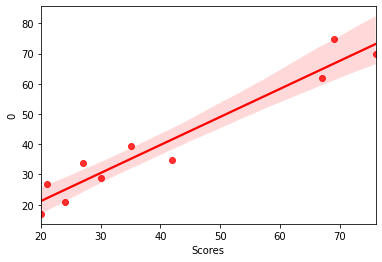

In [60]:
#Find the best fit line between predictions and actual values.
sns.regplot(x= pd.DataFrame(Y_test), y= pd.DataFrame(predictions), data=data,color = 'red');

# Evaluating the model

In [61]:
#Mean Absolute Error
metrics.mean_absolute_error(Y_test,predictions)

4.8529574650299745

In [62]:
#Mean Squared Error
metrics.mean_squared_error(Y_test,predictions)

26.825949523384747

In [63]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(Y_test, predictions))

5.179377329697533

In [64]:
#Calculating the train score on training data.
lr.score(X_train,Y_train)

0.9515815738685994

In [65]:
#Calculating the test score on testing data.
lr.score(X_test,Y_test)

0.9356522115584813

# Predicting the score if student studies 9.25 hours

In [68]:
predict_new = lr.predict(np.array([9.25]).reshape(-1,1))

In [70]:
predict_new

array([[92.77860405]])

Thus, if a student studies 9.25 hours his score will be 92.77.

# Thank You !